이 튜토리얼은 커널 부문 세계1위인 안드레이 룩야넨코의 노트북에 한글로 설명을 추가로 붙인것입니다.  
Table of contents  
Part 1: 데이터 준비 및 모듈 임포트  
Part 2: 파일 병합  
Part 3: 파일 탐색  
Part 4: 데이터 탐구 (Exploratory Data Analysis)   
Part 5: Feature Engineering  
   
Part 6: 마지막 항목 결정  
Part 7: 머신러닝 모델 만들기  
Part 8: 중요도에 따라 모델 재 설정  
Part 9: 하이퍼 파라미터 튜닝  
Part 10: 모델 재 트레이닝  
  
Part 11: 마지막 보팅  
Part 12: 마지막 모델 예측  
Part 13: 제출  

# Part 1: 데이터 준비 및 모듈 임포트

In [1]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거(판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings
warnings.filterwarnings('ignore')

## CSV to DF
- csv를 임포트 하여 데이터 셋이 판다스 데이터 프레임이 되도록 합니다.

In [2]:
test = pd.read_csv(r'D:\Python\titanic_test.csv')
train= pd.read_csv(r'D:\Python\titanic_train.csv')

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


`describe( )`는 각 열의 통계적인 면을 보여줍니다.  
기본은 연속된 값을 가진 열만 보여주나 " include='all' "로 세팅하면 모두 볼 수 있습니다.

In [4]:
train.describe( include='all' )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"O'Connor, Mr. Maurice",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


`dtypes`는 모든 열의 데이터 종류를 보여 줍니다.

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

`info( )`는 `dtypes`의 좀 더 발전된 개념으로 데이터 타입뿐만 아니라 빈칸이 아닌 갯수까지 보여줍니다.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Part 2: 파일 병합
- ntrain과 ntest의 shape을 확보해놓습니다. (병합한 것을 나중에 다시 갈라 놓기 위한 준비)
- y_train은 알려진 결과 값이니 따로 모셔 놓고
- 테스트의 승객 아이디는 나중에 최종 결과에 넣을 것이기 때문에 따로 떼어 놓습니다.
- train과 test를 병합하여 data란 파일을 만듭니다. 문자로 된 것을 숫자로 바꾼다든가. 숫자를 인터발 별로 그룹화한다든가 할 때 한꺼번에 하기 위해 합해 놓습니다.

In [7]:
# 병합준비
ntrain = train.shape[0]
ntest = test.shape[0]

# 아래는 따로 잘 모셔둡니다.
y_train = train['Survived'].values
passId = test['PassengerId']

# 병합 파일 만들기
data = pd.concat([train, test])

# 데이터 행과 열의 크기는
print('data size is: {}'.format(data.shape))

data size is: (1309, 12)


0    549
1    342
Name: Survived, dtype: int64


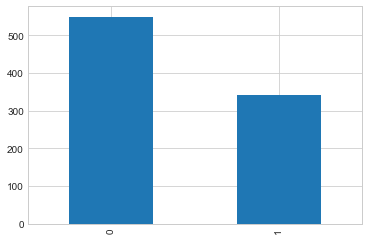

In [8]:
print(train['Survived'].value_counts())
train['Survived'].value_counts().plot(kind='bar');

train 데이터에 있는 인원 중 342명이 살아남고 549명이 사망했다는 것을 볼 수 있습니다.

# Part 3: 파일 탐색

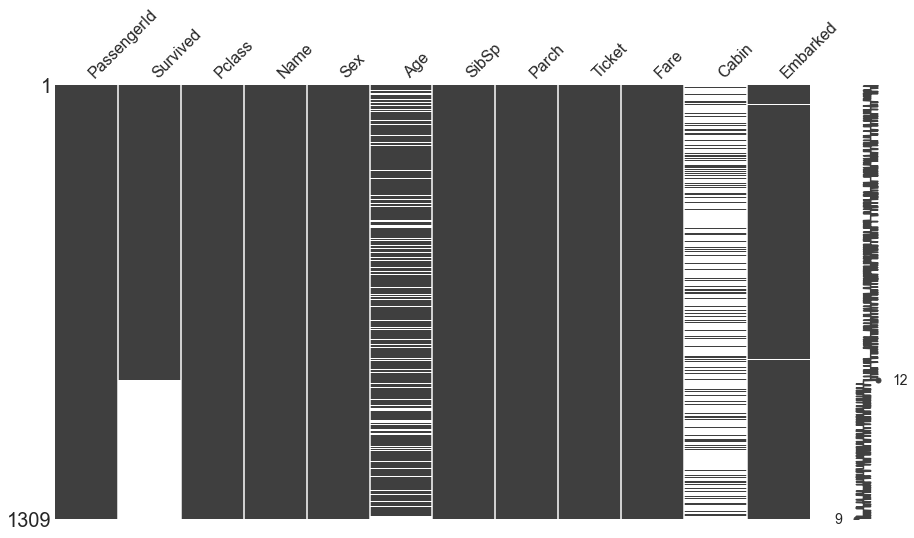

In [9]:
missingno.matrix(data, figsize=(15, 8));

위 도표는 빈 값을 직관적으로 볼 수 있게 합니다. 아래 쪽 `Survived`가 비어 있는데 이 것은 테스트에 우리가 답으로 예측해야 하는 부분이라 그렇습니다.

In [10]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
data.Age.isnull().any()

True

열 이름을 보겠습니다.

In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Features 항목**  

항목의 종류
- 범주형 항목(Categorical Features)  
범주형 항목은 범주형 변수로 된 항목으로 범주형 변수는 둘 이상의 결과 요소가 있는 변수이며 해당 기능의 각 값을 범주별로 분류할 수 있습니다.  
예를 들어 성별은 두가지 범주 (남성과 여성)의 범주형 변수입니다.  

<br>

- 이산형 변수(discrete variable)  
범주형 변수(categorical variable)의 하나로 명목 변수 norminal variable라고도 합니다.  
데이터 셋에서 명목항목: Sex, Embark이며 우리는 Name, Ticket 등을 이로 변환해야 할 것 같습니다.

<br>

- 순서형 항목(Oridinal Variable)  
순위 변수는 범주형의 하나지만 그 차이점은 값 사이의 상대 순서(=서열) 또는 정렬이 가능하다는 것입니다.  
데이터 셋에서 순위항목: PClass이며 우리는 Cabin을 이 범주로 변환해서 사용해야 할 것 같습니다.  

<br>

- 연속형 항목(Continuous Features)  
서로 연속된 값을 가진 변수를 가진 항목이며 여기에서 우리는 연령을 대표적인 것으로 볼 수 있습니다.  
Age, SipSp, Parch, Fare는 interval variable로 만들어 이에 적용해야 할 것 같습니다.

<br>

- 아래의 항목에서 열의 이름을 볼수 있습니다.
|Variable|          정의|Key|
|:-:|:-|:-|
|survival|생존 여부|0 = No, 1 = Yes|
|pclass|선실 등급|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex               |성별  |  |
|Age               |나이  ||
|sibsp             |형재 자매의 수/ 배우자 등이 승선한 경우 수 |   |
|parch             |부모나 자식과 같이 탄 경우 수   ||
|ticket            |표 번호    ||
|fare              |요금||
|cabin             |선실 번호||   
|embarked          |승선한 항구|         C = Cherbourg, Q = Queenstown, S = Southampton|

# Part 4: 데이터 탐구 (Exploratory Data Analysis)
- train 파일 순서대로 데이터 파일의 열들을 봅니다.

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 파일 각 열의 상관관계를 보겠습니다.  
    - Co-relation 매트릭스는 seaborn에서 변수 간 상관계수를 보여주는 표입니다. 
    - 표의 각 셀은 두 변수 간의 상관관계를 보여줍니다. 
    - 상관매트릭스는 고급 분석에 대한 입력 및 고급 분석에 대한 진단으로 데이터를 요약하는데 사용됩니다.
- 아래 마스크 셋업은 0로 행렬을 상관 행렬과 같은 모양으로 만든 후 여기에 불리언 값을 넣고 이를 다시 True만 만듭니다.
- triu는 우측 상단 삼각행렬을의미
- annot=True는 각 셀에 숫자를 표시하라는 것이고, False는 하지 말라는 것이구요

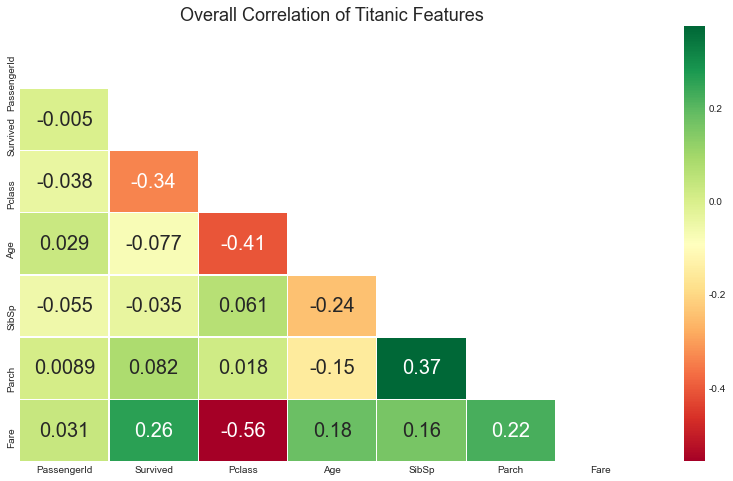

In [14]:
# Co-relation 매트릭스
corr = data.corr()
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 그래프 셋업
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# Co-relation 매트릴스 런칭
sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20});

## 4_1. Survived 분석  
Survived-key: {0:Not Survived, 1:Survived }  
Survived는 숫자로 값을 주지만 Categorical Variable인 셈입니다.  
죽던지 살던지 둘 중 하나의 값을 줍니다.  
countplot을 그려봅니다.  
생존 여부 0과 1의 숫자를 세어 본 후 그림을 그리도록 명령을 하는 것입니다.  
plt의 figure라는 메소드를 써서 그림판의 크기를 정하고, seaborn의 카운트 플롯을 그리라는 것입니다.

0    549
1    342
Name: Survived, dtype: int64


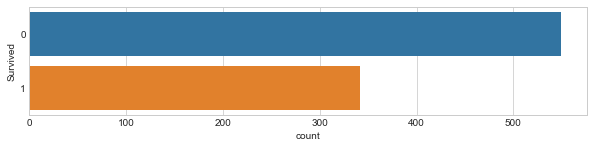

In [15]:
fig = plt.figure(figsize=(10, 2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

- 불행히도 사망자가 훨씬 많아 보입니다.
- 전체 사망자 비율을 좀 보겠습니다.


- 파이 그래프와 카운트 플롯을 서브플롯으로 그립니다.


- 행은 하나, 열은 2개의 서브 플롯입니다. 
- 'Survived'의 값을 카운트해서 파이플롯을 만듭니다.
- explode는 폭발하는 것이니깐 1이면 튀어 나가는 것인데 0을 주면 분리만 되고 돌출은 되지 않흡니다. 이어서 0, 1인 것은 첫번째 것은 아니고 두번째 것은 분리된다는 의미로 생각하시면 됩니다.
- autopercent는 1.1이 표현하는 부분은 소수점 한 자리까지 보여주라는 의미입니다.
- ax[0]은 첫번째 칸입니다.

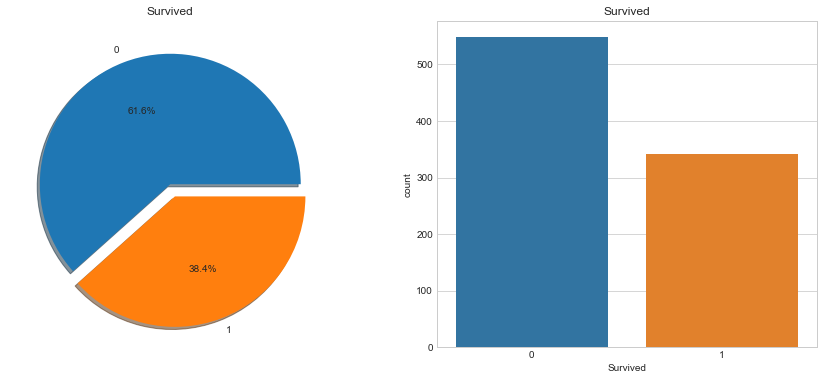

In [16]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Survived');

- 위의 코드를 함수로 만들겠습니다

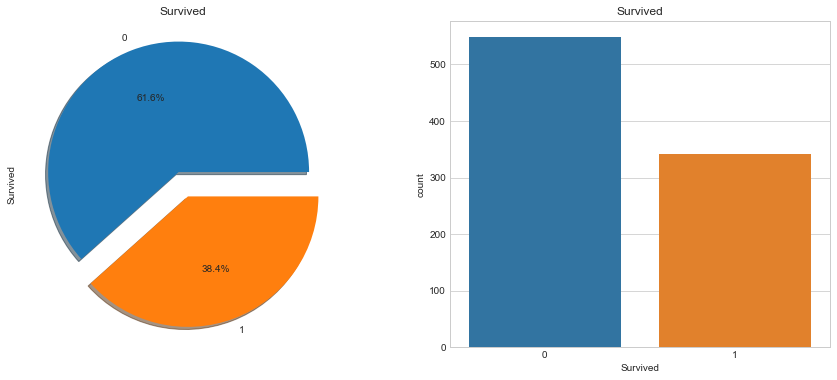

In [17]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel(col)
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()
    
piecount('Survived')

## 4_2. Pclass 분석
- Pclass는 값이 숫자이나 서열이 정해진 Oridinal Feature
- Key:1 = 1st, 2 = 2nd, 3 = 3rd
- 각 클래스 당 생존자를 보겠습니다.

In [18]:
train.groupby(['Pclass','Survived'])['Survived'].count( )

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [19]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 1등급 객실의 사람들은 생존자가 더 많고, 2등급은 생존자에 비해 사망자가 조금 더 많으나, 3등급은 사망자가 3배 이상 많다는 것을 알 수 있습니다.

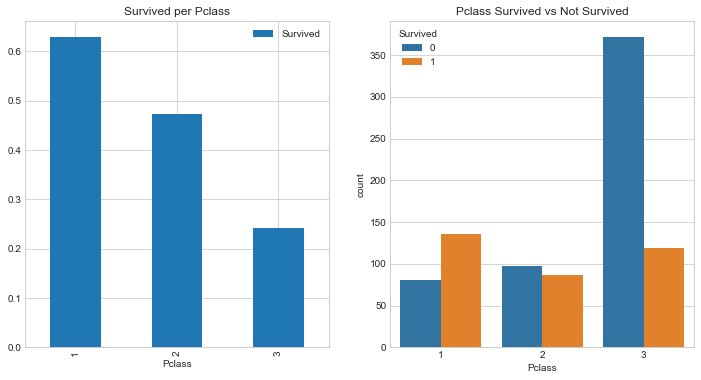

In [20]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pclass')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass Survived vs Not Survived');

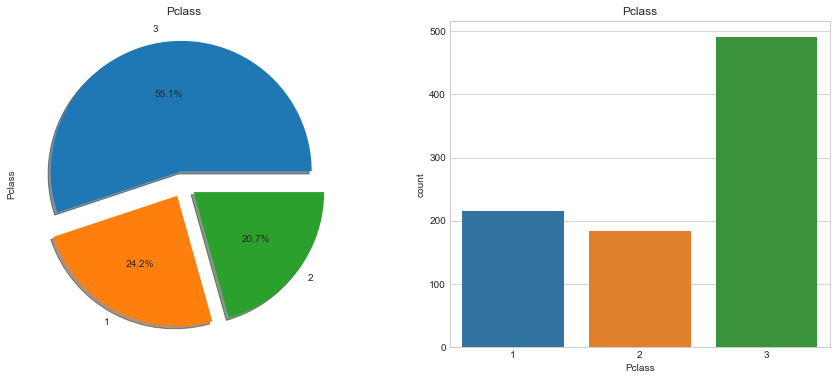

In [21]:
piecount('Pclass')

- 비율로는 3등갘이 반이 넘으나 생존자 측면에서는 1등석이 가장 많다는 것을 알 수 있습니다.

## 4_3. Name 분석
- 이름은 거의 모두 다를 가능성이 큽니다. Family Name, First Name, Middle Name and even Dr.Capt 등등
- 분류를 한번 해봅시다.
- 리스트로 나열 해보겠습니다.

In [22]:
len(data.Name.value_counts())

1307

- 1307개의 이름이 존재합니다.
- ['initial']이란 열을 새로 만들어서 여기에 Name에서 추출한 Regular Expression을 넣습니다.
- 아래에서 str.extract('([A-Za-z]+0.')부분은 str에서 대문자 A\~Z, 소문자 a\~z중에 .명령을 통해. 으로 끝나는 부분을 추출해 내는 것입니다.


In [23]:
temp = data.copy( )
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [24]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Mme           1
Countess      1
Don           1
Jonkheer      1
Capt          1
Dona          1
Sir           1
Lady          1
Name: Initial, dtype: int64

Mr나 Miss 등은 많으나 익숙하지 않은 성들도 보입니다.

In [25]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


- 생존률로 봅시다.
- 생존률 함수를 만들어 보겠습니다.

In [26]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

- 생존 숫자로 봅시다.
- test에 있는 Dona의 나이를 보고 어디에 넣을지 보겠습니다.
- Mrs.는 현대처럼 Miss+Mrs를 합친 말이 아니라 당시에는 귀족 미망인을 의미하는 것이었습니다.
- Mlle나 Mme 등도 마드모아젤과 마담의 줄임말인 경우일 것입니다. 귀족 여성들로 보아야 겠죠

In [27]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [28]:
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

LastName,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,Ali,Allen,Allison,Allum,Andersen,Anderson,Andersson,Andreasson,Andrew,Andrews,Angle,Appleton,Arnold,Artagaveytia,Asim,Asplund,Astor,Attalah,Aubart,Augustsson,Ayoub,Backstrom,Baclini,Badt,Bailey,Balkic,Ball,Banfield,Barah,Barbara,Barber,Barkworth,Barton,Bateman,Baumann,Baxter,Bazzani,Beane,Beavan,Becker,Beckwith,Beesley,Behr,Bengtsson,Berglund,Berriman,Betros,Bidois,Bing,Birkeland,Bishop,Bissette,Bjornstrom,Blackwell,Blank,Bonnell,Bostandyeff,Boulos,Bourke,Bowen,Bowerman,Bracken,Bradley,Braund,Brewe,Brocklebank,Brown,Bryhl,Burke,Burns,Buss,Butler,Butt,Byles,Bystrom,Cacic,Cairns,Calderhead,Caldwell,Calic,Cameron,Campbell,Canavan,Cann,Caram,Carbines,Cardeza,Carlsson,Carr,Carrau,Carter,Cavendish,Celotti,Chaffee,Chambers,Chapman,Charters,Cherry,Chibnall,Chip,Christmann,Christy,Chronopoulos,Clarke,Cleaver,Clifford,Coelho,Cohen,Coleff,Coleridge,Collander,Colley,Collyer,Compton,Connaghton,Connolly,Connors,Cook,Cor,Corn,Coutts,Coxon,Crease,Cribb,Crosby,Culumovic,Cumings,Cunningham,Dahl,Dahlberg,Dakic,Daly,Danbom,Daniel,Danoff,Dantcheff,Davidson,Davies,Davis,Davison,Dean,Denkoff,Dennis,Devaney,Dick,Dimic,Dodge,Doharr,Doling,Dooley,Dorking,Douglas,Dowdell,Downton,Drazenoic,Drew,Duane,Duff,Duran,Edvardsson,Eitemiller,Eklund,Ekstrom,Elias,Elsbury,Emanuel,Emir,Endres,Eustis,Fahlstrom,Farrell,Farthing,Faunthorpe,Fischer,Fleming,Flynn,Foo,Ford,Foreman,Fortune,Fox,Francatelli,Frauenthal,Frolicher,Frost,Fry,Funk,Futrelle,Fynney,Gale,Gallagher,Garfirth,Garside,Gaskell,Gavey,Gee,Gheorgheff,Giglio,Giles,Gilinski,Gill,Gillespie,Gilnagh,Givard,Glynn,Goldenberg,Goldschmidt,Goldsmith,Goncalves,Goodwin,Graham,Green,Greenberg,Greenfield,Gronnestad,Guggenheim,Gustafsson,Haas,Hagland,Hakkarainen,Hale,Hamalainen,Hampe,Hanna,Hansen,Harder,Harknett,Harmer,Harper,Harrington,Harris,Harrison,Hart,Hassab,Hassan,Hawksford,Hays,Healy,Hedman,Hegarty,Heikkinen,Heininen,Hendekovic,Henry,Herman,Hewlett,Hickman,Hippach,Hirvonen,Hocking,Hodges,Hogeboom,Hold,Holm,Holverson,Homer,Honkanen,Hood,Horgan,Hosono,Hoyt,Humblen,Hunt,Ibrahim,Icard,Ilett,Ilmakangas,Isham,Ivanoff,Jacobsohn,Jalsevac,Jansson,Jardin,Jarvis,Jenkin,Jensen,Jermyn,Jerwan,Johannesen,Johanson,Johansson,Johnson,Johnston,Jonkoff,Jonsson,Jussila,Kallio,Kalvik,Kantor,Karaic,Karlsson,Karun,Kassem,Keane,Keefe,Kelly,Kent,Kenyon,Kiernan,Kilgannon,Kimball,Kink,Kirkland,Klaber,Klasen,Knight,Kraeff,Kvillner,Lahoud,Lahtinen,Laitinen,Laleff,Lam,Landergren,Lang,Laroche,Larsson,LeRoy,Leader,Leeni,Lefebre,Lehmann,Leinonen,Leitch,Lemberopolous,Lemore,Lennon,Leonard,Lester,Lesurer,Levy,Lewy,Leyson,Lievens,Lindahl,Lindblom,Lindell,Lindqvist,Lines,Ling,Lobb,Long,Longley,Louch,Lovell,Lulic,Lundahl,Lurette,Mack,Madigan,Madill,Madsen,Maenpaa,Maioni,Maisner,Mallet,Mamee,Mangan,Mannion,Marechal,Markoff,Markun,Marvin,Masselmani,Matthews,Mayne,McCarthy,McCormack,McCoy,McDermott,McEvoy,McGough,McGovern,McGowan,McKane,McMahon,McNamee,Meanwell,Meek,Mellinger,Mellors,Meo,Mernagh,Meyer,Millet,Milling,Minahan,Mineff,Mionoff,Mitchell,Mitkoff,Mockler,Moen,Molson,Montvila,Moor,Moore,Moran,Moraweck,Morley,Morrow,Moss,Moubarek,Moussa,Moutal,Mudd,Mullens,Murdlin,Murphy,Myhrman,Naidenoff,Najib,Nakid,Nankoff,Nasser,Natsch,Navratil,Nenkoff,Newell,Newsom,Nicholls,Nicholson,Nicola,Nilsson,Nirva,Niskanen,Norman,Nosworthy,Novel,Nye,Nysten,Nysveen,O,Odahl,Ohman,Olsen,Olsson,Olsvigen,Oreskovic,Osen,Osman,Ostby,Otter,Padro,Pain,Palsson,Panula,Parkes,Parr,Parrish,Partner,Pasic,Patchett,Paulner,Pavlovic,Pears,Peduzzi,Pekoniemi,Penasco,Pengelly,Perkin,Pernot,Perreault,Persson,Peter,Peters,Petranec,Petroff,Petterson,Pettersson,Peuchen,Phillips,Pickard,Pinsky,Plotcharsky,Ponesell,Porter,Potter,Quick,Radeff,Razi,Reed,Reeves,Rekic,Renouf,Reuchlin,Reynaldo,Rice,Richard,Richards,Ridsdale,Ringhini,Rintamaki,Risien,Robbins,Robert,Robins,Roebling,Rogers,Romaine,Rommetvedt,Rood,Rosblom,Ross,Rothes,Rothschild,Rouse,Rugg,Rush,Ryan,Ryerson,Saad,Saalfeld,Sadlier,Sage,Sagesser,Salkjelsvik,Salon

- 이제 우리는 Initial에서 Mr.등의 포칭을 뽑아내었고, 성을 뽑아내었습니다.
- 머신이 알파벳보다 숫자를 좋아하므로 숫자로 바꿉니다.
- 아, 그러기 전에 Donna를 처리해야죠.

In [29]:
temp.loc[temp['Initial'] == 'Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


- 나이로 추측해서 Mrs.로 넣습니다.
- 결측치를 처리하는 방법은 많으나 이렇게 하나일 경우에는 가장 적절한 추측을 사용하여 넣는 것도 괜찮습니다.

In [30]:
temp.loc[temp['Initial']=='Dona','Initial'] = 'Mrs'

In [31]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [32]:
temp['NumName'] = temp['LastName'].factorize()[0]
temp['NumName'].tail(10)

408    847
409    744
410    848
411    211
412    849
413    850
414    851
415    852
416    799
417    116
Name: NumName, dtype: int64

In [33]:
temp.loc[temp['LastName']=='Ali']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
210,211,0.0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S,Mr,Ali,182
784,785,0.0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.05,NaN,S,Mr,Ali,182


- 보시다시피 같은 Last name에 같은 번호가 쓰여졌다.
- 끝에 [0]은 레이블만 보고 번호를 붙이는 것으로 정말 unique한 것이란 것은 안 본다는 것입니다.
    - factorize를 사용하여 배열의 튜플( array([0, 1, 2, ...]), index(['Ali, Capt, ...], dtype='object'))을 반환하므로 [0]을 선택해주는 것입니다.
- 자 이제 이름을 의미하는 중요한 요소 두 개를 숫자로 바꾸었으니 다음으로 갑시다.

## 4_4. Sex 분석
- 함수를 만들어서 train 파일을 보지요

In [34]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


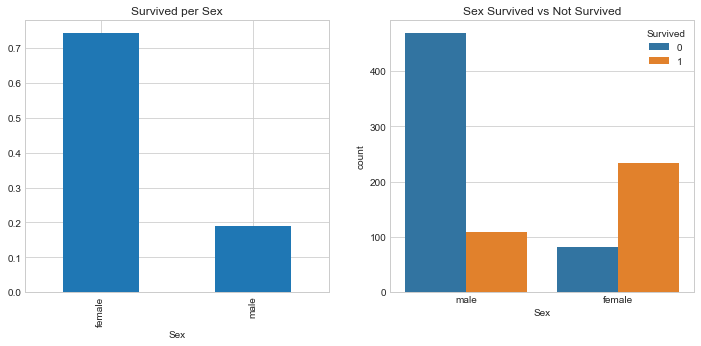

In [35]:
def bag(col, target, title, title1):
    f, ax = plt.subplots(1, 2, figsize=(12, 5))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()
    
bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')

- 배에 있던 남자의 수는 여자의 수보다 훨씬 많습니다. 여전히 생존 여성 수는 남성 수의 거의 두배입니다. 선박 여성의 생존률은 약 75%인 반면 남성의 생존율은 약 18~19%입니다.
- 이것은 남성/여성을 1, 2로 나누면 죌 것 같은 뻔해 보이는 것이지만 좀 더 세분화하면 좋아보입니다.
- 예를 들어 아기들은 아기인지 남자인지 여자인지 구명보트를 태울 때 안 물어볼 것 이기 때문입니다.
- 오히려 (불행하게도) 귀족 아기인지 서민의 아기인지는 삶과 불생을 가를 수 있습니다.
- 생존 Pclass별로 성병을 봅니다.

In [36]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

## 4_5. Age 분석
- Age는 Continuous한 값입니다.
- 빈칸이 많아서 빈칸처리가 결정적인 역할을 할 것 같습니다.
- Age의 최대, 최소, 중간을 보겠습니다.

In [37]:
print('Oldest Passenger was', data['Age'].max(), 'Years')
print('Youngest Passenger was', data['Age'].min(), 'Years')
print('Average Age on the ship was', int(data['Age'].mean()), 'Years')

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.17 Years
Average Age on the ship was 29 Years


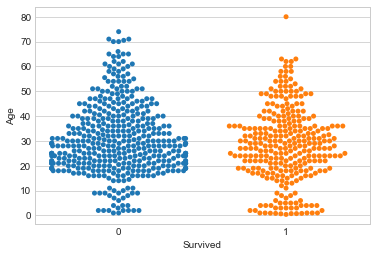

In [38]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel('Survived')
plt.ylabel('Age');

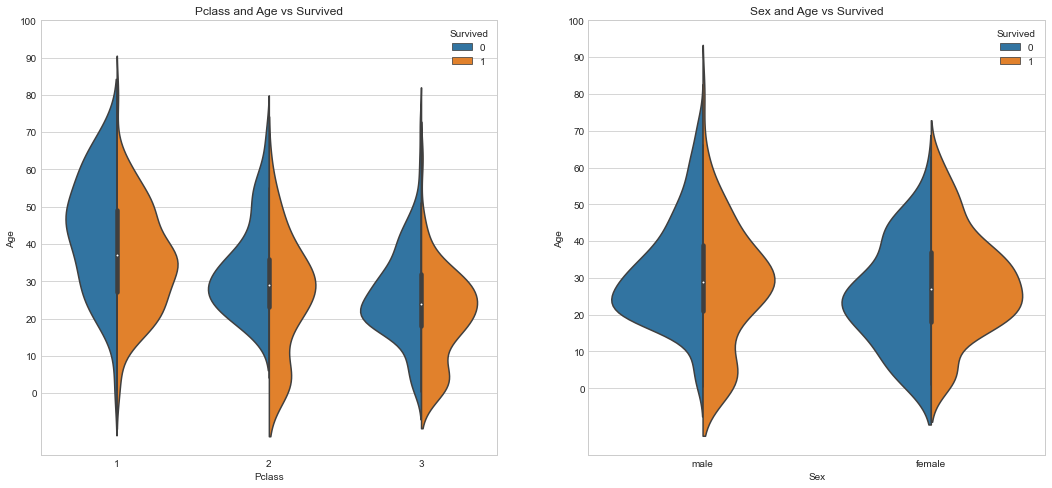

In [39]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass','Age', hue='Survived', data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 관찰:
    1. PClass에 따라 어린이의수가 증가하고 10세 미만의 어린이(즉, 어린이)의 생존율은 Pclass에 상관없이 양호해 보입니다.
    2. PClass1에서 20-50세의 Passenger의 생존 가능성은 높고 여성에게는 더 좋습니다.
    3. 남성의 경우 생존확률이 나이가 증가함에 따라 감소합니다.  

우선 age의 빈칸부터 해결합니다.  
앞에서 살펴본 것처럼 Age 항목에는 177null 값이 있습니다. 이러한 NaN값을 대체하기 위해 데이터 집합의 평균수명을 지정할 수 있습니다.  
그러나 문제는 평균 연령이 29세를 4세 아이에게 할당할 수 없습니다. 승객이 어떤 연령대에 있는지 알 수 있는 방법이 있을까요? 이름에서 힌트를 찾아봅니다.
- Initial 별 평균 연령을 보고 Age에 적용시키는 것이 좋을 것 같습니다.

In [40]:
temp.groupby('Initial').agg({'Age':['mean','count']}) # 이니셜 별 평균 연령 체크

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       37.005848   171
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [41]:
temp = temp.reset_index(drop=True)
temp['Age']=temp.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))
temp[31:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.005848,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,30
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,Miss,Glynn,31
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,NaN,S,Mr,Wheadon,32
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,Mr,Meyer,33
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,Mr,Holverson,34
36,37,1.0,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,Mr,Mamee,35
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,NaN,S,Mr,Cann,36
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,Miss,Vander,18
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,Miss,Nicola,37
40,41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,NaN,S,Mrs,Ahlin,38


- 이제 Initial을 좀 정리합니다

In [42]:
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' ,
                         'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 
                         'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 
                         'Ms', 'Rev', 'Sir'], 
                        ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 
                         'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 
                         'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 
                         'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids','Miss','Mr','Mrs','Nobles','Respected','Sacrificed'],
                        [4, 4, 2, 5, 6, 3, 1])
# 모든 나이를 10개의 단위로 나눔
# temp['Age_Range']에는 이 사람이 어느 나이대(binning된)에 속하는 지에 대한 정보를 말해줌
temp['Age_Range']=pd.qcut(temp['Age'], 10)

In [43]:
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [44]:
temp['Agroup']=0

temp.loc[temp['Age']<1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >= 1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <=52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0,"(21.0, 23.0]",21
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1,"(33.0, 39.0]",36
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2,"(23.0, 26.0]",24
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3,"(33.0, 39.0]",36
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,4,"(33.0, 39.0]",36


- Age는 그룹화시키면 좋으나 학습을 위해서 그냥 놓아두고, 그룹화 연습은 Fare로 하겠습니다
- 위를 보고 sex를 남, 녀, 1세 이하 Baby로 나누겠습니다. 1, 2, 3번을 주지오

In [45]:
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

In [46]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

## 4_6 Family or Alone? ("SibSp"+"Parch") 분석
- "SibSp" + "Parch"분석
- SibSp - 이 항목은 탑승자가 혼자인지 또는 가족과 함께 있는지를 나타냅니다.
- \*Sibling = 형제, 자매, 의붓 형제, 이복 누이
- Spouse = 남편, 아내
- Parch는 부모와 함께 탔는지를 봅니다.
- 이 그룹 둘을 'Alone'그룹과 'Family'그룹으로 나눕니다.

In [47]:
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1

In [48]:
temp['Family'] = temp['Parch'] + temp['SibSp'] + 1
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0,"(21.0, 23.0]",21,NaN,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1,"(33.0, 39.0]",36,NaN,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2,"(23.0, 26.0]",24,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3,"(33.0, 39.0]",36,NaN,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,4,"(33.0, 39.0]",36,1.0,1


In [49]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

- 크로스탭은 다시 식구 많은 쪽은 Pclass3에 있음을 보여줍니다.
- 여기에서도 결과는 매우 비슷합니다. 부모와 함께 탑승한 승객은 생존 가능성이 높지만 숫자가 올라갈수록 줄어듭니다.
- 생존 가능성은 배에 1-3명의 부모가 있는 누군가에게 좋습니다. 혼자 또한 생존성이 낮은것으로 판명되고 가족이 4명 이상 있으면 생존 가능성이 줄어듭니다.
- 이는 소수의 가족들이 있는 귀족층이 생존하고, 
- 혼자가 많은 젊은이들은 양보를 할 수 밖에 없고, 
- 가족들이 많은 사람들(특히 귀족이 아닌 3등칸 사람들)은 전원이 타지 못하면 어느 누구도 탈수가 없는 비극적인 당시 상황을 보여줍니다.

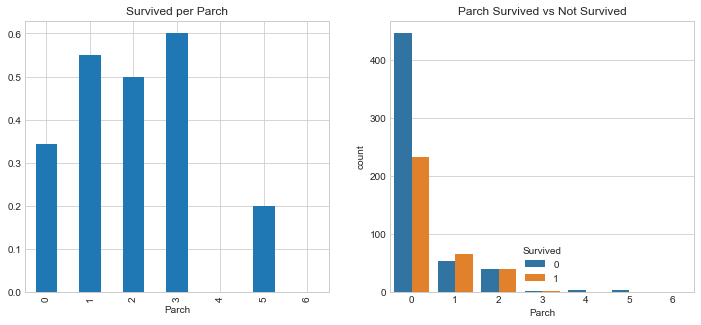

In [50]:
bag('Parch','Survived','Survived per Parch','Parch Survived vs Not Survived')

In [51]:
pd.crosstab([temp.Family, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap="summer_r")

## 4_7 Ticket 분석
- Ticket의 형태를 보겠습니다.

In [52]:
temp.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

- 도무지 감이 안 잡히는 배열입니다.
- 빈칸이 없는지 보겠습니다.

In [53]:
temp.Ticket.isnull().any()

False

- 티켓에서 영문 있는 것과 숫자만 있는 것을 따봅니다.

In [54]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z0-9]+)')

temp = temp.reset_index(drop=True)
# 복사한 항목들을 사용하다보면 'ValueError: cannot reindex from a duplicate axis' 
# 이런 에러가 나오는 경우가 많은 데 이런 것은 이 코드로 리셋을 한번 해주면 됩니다.

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,4,"(33.0, 39.0]",36,1.0,1,373450


In [55]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN


In [56]:
temp['NumTicket'] = temp['Initick'].factorize()[0]
temp.head(n=15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,...,S,Mr,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,...,C,Mrs,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,...,S,Miss,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,...,S,Mrs,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,...,S,Mr,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,...,Q,Mr,Moran,5,"(30.0, 32.252]",33,1.0,1,NaN,-1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,...,S,Mr,McCarthy,6,"(48.0, 80.0]",60,1.0,1,NaN,-1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,...,S,Kids,Palsson,7,"(0.169, 16.0]",2,NaN,5,NaN,-1
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,...,S,Mrs,Johnson,8,"(26.0, 30.0]",28,NaN,3,NaN,-1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,...,C,Mrs,Nasser,9,"(0.169, 16.0]",13,NaN,2,NaN,-1


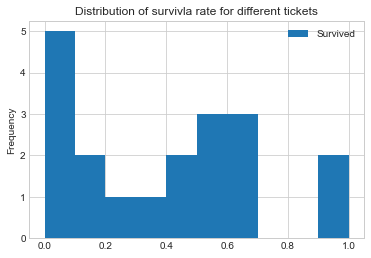

In [57]:
temp.groupby('NumTicket')['Survived'].mean().to_frame().plot(kind='hist')
plt.title('Distribution of survivla rate for different tickets');

## 4_8 Fare 분석

In [58]:
print('Highest Fare was:', temp['Fare'].max())
print('Lowest Fare was:', temp['Fare'].min())
print('Average Fare was:', temp['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.2954792813456


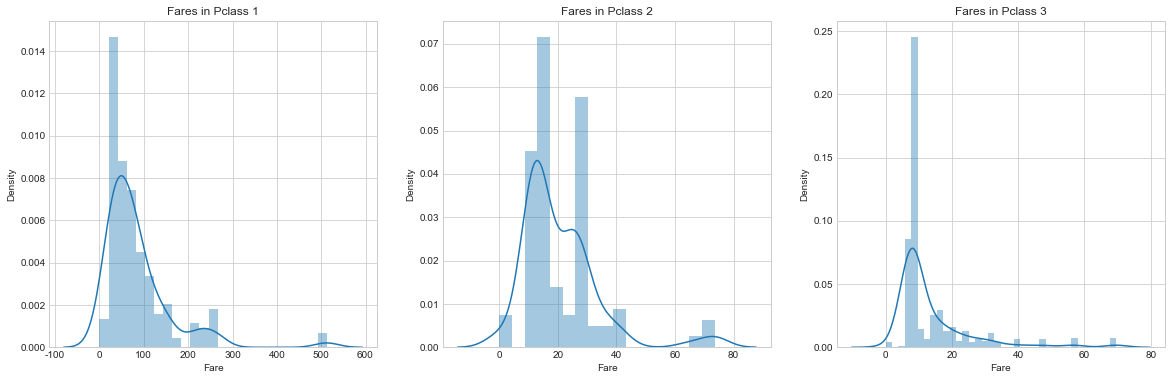

In [59]:
f, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.distplot(train[train['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3');

- Pclass1의 승객 요금에는 큰 분포가 있는 것으로 보이며 불연속 값으로 변환할 수 있습니다.
- Fare를 그룹으로 나누어 놓겠습니다
- qcut을 활용하면 원하는 조각으로 데이터를 나누어 줍니다.

In [60]:
def groupmean(a, b):
    return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

temp['Fare_Range'] = pd.qcut(train['Fare'], 10)
groupmean('Fare_Range','Fare')

,Fare
Fare_Range,
"(-0.001, 7.55]",5.928717
"(7.55, 7.854]",7.768490
"(7.854, 8.05]",7.963669
"(8.05, 10.5]",9.521367
"(10.5, 14.454]",12.940231
"(14.454, 21.679]",17.386408
"(21.679, 27.0]",25.487501
"(27.0, 39.688]",32.282186
"(39.688, 77.958]",59.444572


- Fare를 그룹화시킵니다. Fgroup이라고 이름 짓겠습니다.  


In [61]:
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <=0, 'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4


## 4_9 Cabin 분석
- Cabin의 위치에 따라 달라지는 것이 있는지 보겠습니다.

In [62]:
temp.Cabin.value_counts().head(10)

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
B96 B98            4
D                  4
F4                 4
F33                4
C22 C26            4
C78                4
Name: Cabin, dtype: int64

In [63]:
temp.Cabin.isnull().sum()

1014

- 빈칸이 무척 많습니다.
- Cabin에 비어있는 것이 많아 이를 다른 분류로 일단 잡고 기존 것은 이니셜로 분류합니다.
- 빈 것은 X로 구분하려는데 이 또한 1, 2, 3 Pclass와 연동될 것 같으니 비어있고 1등급은 X, 2등급은 Y, 3등급은 Z로 하겠습니다.

In [64]:
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Z'

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,C
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,C
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,Z


In [65]:
temp['Inicab'] = temp['Inicab'].factorize()[0]
temp[10:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",2,4.000000,1,1,PP 9549,16.7000,...,10,"(0.169, 16.0]",7,NaN,3,PP,3,"(14.454, 21.679]",5,4
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,...,11,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,...,12,"(16.0, 21.0]",18,1.0,1,A,0,"(7.854, 8.05]",4,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,...,13,"(33.0, 39.0]",45,NaN,7,NaN,-1,"(27.0, 39.688]",7,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,...,14,"(0.169, 16.0]",13,1.0,1,NaN,-1,"(7.55, 7.854]",2,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,...,15,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(14.454, 21.679]",5,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,...,16,"(0.169, 16.0]",2,NaN,6,NaN,-1,"(27.0, 39.688]",7,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,...,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(10.5, 14.454]",5,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,...,18,"(30.0, 32.252]",31,NaN,2,NaN,-1,"(14.454, 21.679]",5,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,37.005848,0,0,2649,7.2250,...,19,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(-0.001, 7.55]",2,0


## 4_10 Embarked 분석

In [66]:
pd.crosstab([temp.Embarked, temp.Pclass], [temp.Sex, temp.Survived], margins=True).style.background_gradient(cmap='summer_r')

- 승선 장소별 생존 확률

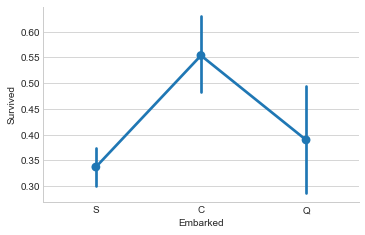

In [67]:
sns.factorplot('Embarked','Survived',data=temp)
fig = plt.gcf()
fig.set_size_inches(5, 3);

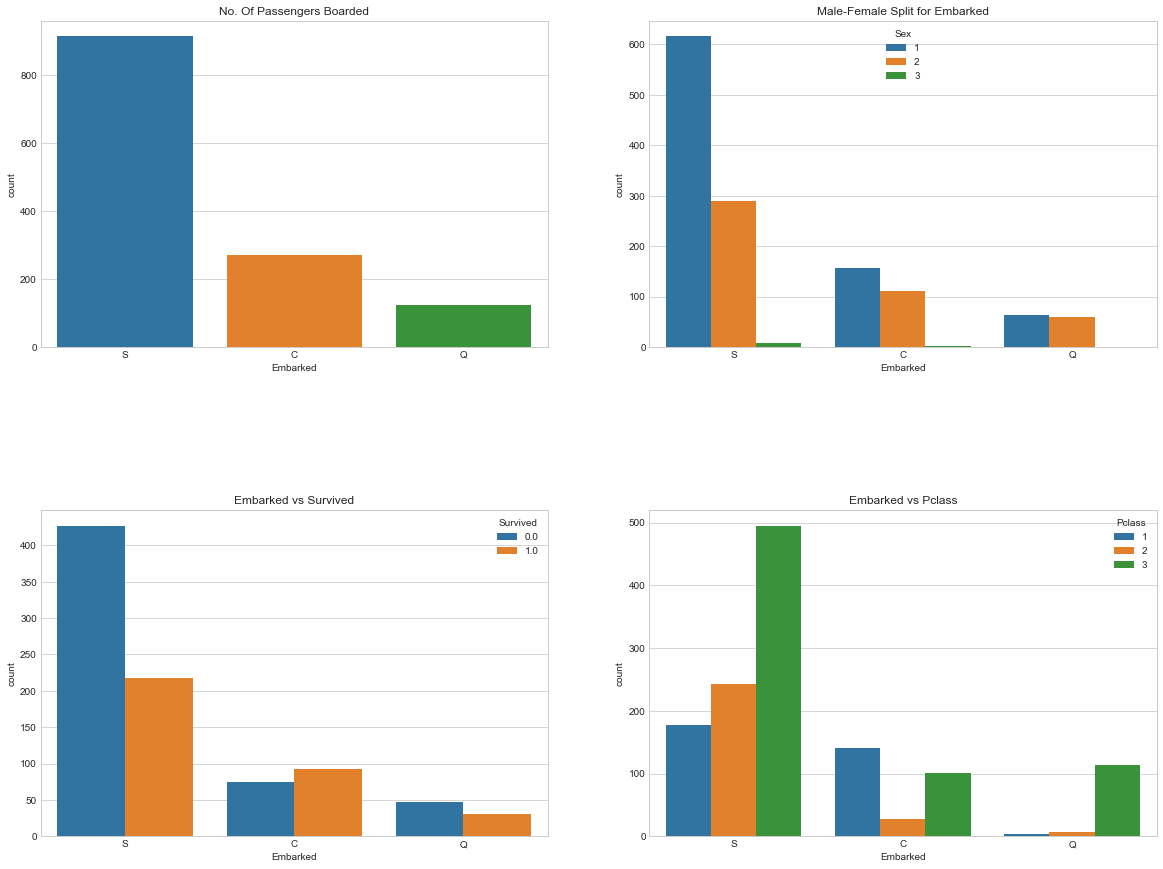

In [68]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5);

1. 포트 C의 생존 가능성은 0.55 정도이며 S는 가장 낮습니다. S에서 탑승 최대. 대다수는 Pclass 3
2. C의 승객들은 많은 비율이 살아남았습니다. 그 이유는 Pclass1 및 Pclass2 승객이 많아서일 것입니다.
3. Embark S는 대부분의 부자들이 탑승한 항구지만 생존 가능성이 낮습니다. Pclass3의 승객도 많았습니다.
4. 포트 Q는 승객의 거의 95%가 Pclass3
    - 빈칸이 두개 있는데 보겠습니다.

In [69]:
temp.loc[(temp.Embarked.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,...,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,...,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8


- 두 사람의 티켓 번호가 같습니다.
- 혹시 같은 티켓 번호가 있는 다른 사람이 있는지 봅니다.

In [70]:
temp.loc[(temp.Ticket == '113572')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,...,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,...,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8


In [71]:
temp.sort_values(['Ticket'], ascending=True).iloc[55:70, 2:12]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,1,"Ostby, Mr. Engelhart Cornelius",1,65.000000,0,1,113509,61.9792,B30,C
351,1,"Williams-Lambert, Mr. Fletcher Fellows",1,32.252151,0,0,113510,35.0000,C128,S
252,1,"Stead, Mr. William Thomas",1,62.000000,0,0,113514,26.5500,C87,S
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.000000,0,0,113572,80.0000,B28,NaN
61,1,"Icard, Miss. Amelie",2,38.000000,0,0,113572,80.0000,B28,NaN
802,1,"Carter, Master. William Thornton II",1,11.000000,1,2,113760,120.0000,B96 B98,S
390,1,"Carter, Mr. William Ernest",1,36.000000,1,2,113760,120.0000,B96 B98,S
435,1,"Carter, Miss. Lucile Polk",2,14.000000,1,2,113760,120.0000,B96 B98,S
763,1,"Carter, Mrs. William Ernest (Lucile Polk)",2,36.000000,1,2,113760,120.0000,B96 B98,S
185,1,"Rood, Mr. Hugh Roscoe",1,32.252151,0,0,113767,50.0000,A32,S


- 앞 뒤로 모두 S이고 Pclass도 모두 1인 것으로 봐서 S일 가능성이 큽니다.

In [72]:
temp.loc[(temp.Embarked.isnull()), 'Embarked'] = 'S'

In [73]:
temp['Embarked'] = temp['Embarked'].factorize()[0]
temp.iloc[11:20, 2:12]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,C103,0
12,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,NaN,0
13,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,NaN,0
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,NaN,0
15,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,NaN,0
16,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,NaN,2
17,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,NaN,0
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,NaN,0
19,3,"Masselmani, Mrs. Fatima",2,37.005848,0,0,2649,7.2250,NaN,1


# Part 5: Feature Engineering
- 문자를 숫자로 바꾸는 것도 Feature Engineering의 일부이나 위에서 대부분 다했습니다.  

<br>

**항목 추가하기**
- 위에 추가 항목을 몇개 만들어보았습니다.
- 그래도 5개 정도 만들어봅시다.
1. Priority - Nobles, Women in Pclass 1 & 2, Babies under 1, Kids under 17 in Pclass 1 & 2, higher fare, Women in Pclass 3 and so on
2. FH - Female Higher Survival Group
3. MH - Male Higher Survival Group
4. FL - Female Lower Survival Group
5. ML - Male Lower Survival Group

- **Priority**  
1) Nobles  
2) Women in Pclass 1  
3) Babies under 1  
4) Kids under 17 in Pclass 1 & 2  
5) Women in Pclass 2  
6) Higher Fare

In [74]:
survpct('Initial')

Initial
Kids          0.575000
Miss          0.697802
Mr            0.156069
Mrs           0.792000
Nobles        1.000000
Respected     0.454545
Sacrificed    0.000000
Name: Survived, dtype: float64

In [75]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [76]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [77]:
survpct('Age').head()

Age
0.17    NaN
0.33    NaN
0.42    1.0
0.67    1.0
0.75    1.0
Name: Survived, dtype: float64

In [78]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [79]:
temp['Priority'] = 0
temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age']<1), 'Priority'] = 3
temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

In [80]:
survpct('Priority')

Priority
0    0.230655
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [81]:
temp.Priority.value_counts()

0    980
7    145
6    105
2     52
5     16
3      7
4      4
Name: Priority, dtype: int64

In [82]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [83]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [84]:
temp['FH'] = 0
temp.loc[(temp['Sex'] == 1), 'FH'] = 0
temp.loc[(temp['Sex'] == 2), 'FH'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

In [85]:
survpct('FH')

FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64

In [86]:
temp.FH.value_counts()

0    847
8    354
1     89
7      8
2      7
3      4
Name: FH, dtype: int64

In [87]:
temp['MH'] = 0
temp.loc[(temp['Sex'] == 2), 'MH'] = 0
temp.loc[(temp['Sex'] == 1), 'MH'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH'] = 8

In [88]:
survpct('MH')

MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64

In [89]:
temp.MH.value_counts()

0    474
8    450
1    335
7     16
2     13
5      8
6      7
3      6
Name: MH, dtype: int64

In [90]:
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1), 'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6

In [91]:
survpct('FL')

FL
0    0.191710
1    0.000000
2    0.809211
4    0.939394
5    0.272727
6    0.616667
Name: Survived, dtype: float64

In [92]:
temp.FL.value_counts()

0    847
2    225
6    100
4     94
5     41
1      2
Name: FL, dtype: int64

In [93]:
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2), 'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

In [94]:
survpct('ML')

ML
0    0.746082
1    0.333333
2    0.318966
3    0.076923
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64

In [95]:
temp.ML.value_counts()

0    474
6    372
4    224
2    176
5     41
3     19
1      3
Name: ML, dtype: int64

# Part 6: 마지막 항목 결정
- 이제 다음 단계로 갑니다.
- 두개의 새로운 데이터 프레임을 만듭니다. 하나는 레이블 인코딩, 다른 하나는 원핫 인코딩

<br>
<br>

- 대표적인 인코딩에 Label Encoding이 있는데 이는 각 항목의 값을 서열화 시켜 주~욱 줄세운 것이라고 생각하시면 됩니다
- 그 외에 자주쓰는 One Hot Encoding 같은 경우 열 내에서의 항목을 나누어서 (열이 주~욱 늘어나며) 이를 0이냐 1이냐로 구분해 놓은 것입니다.

<br>
<br>

- 다시 말씀 드려서 레이블 인코딩은 줄을 세워서 번호를 부여하는 것이고, 원핫인코딩은 긴가 아닌가 두가지 입니다.
- 예를 들어 나이별로 줄을 세워 너는 5번, 너는 6번 이런식이 레이블 인코딩이고
- 16살이야? 1 / 그 다음 17살이야? 0 이런 식이라 열의 수가 무지막지하게 늘어납니다.

In [96]:
temp['F1'] = temp['Priority']
temp['F2'] = temp['FH']
temp['F3'] = temp['MH']
temp['F4'] = temp['FL']
temp['F5'] = temp['ML']
temp['F6'] = temp['Initial']
temp['F7'] = temp['Fgroup']
temp['F8'] = temp['NumName']
temp['F9'] = temp['NumTicket']
temp['F10']= temp['Family']
temp['F11']= temp['Embarked']
temp['F12']= temp['Sex']
temp['F13']= temp['Pclass']

In [97]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [98]:
dfl = pd.DataFrame() # for Label Encoding

good_columns = ['F'+ str(i) for i in range(1, 14) ]
dfl[good_columns] = temp[good_columns]
dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,Mr,2,0,0,2,0,1,3
1,2,8,0,2,0,Mrs,8,1,1,2,1,2,1
2,0,7,0,6,0,Miss,3,2,2,1,0,2,3
3,2,8,0,2,0,Mrs,8,3,-1,2,0,2,1
4,0,0,1,0,6,Mr,4,4,-1,1,0,1,3


In [99]:
dfh = dfl.copy()
dfl_enc = dfl.apply(LabelEncoder().fit_transform)
dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,1,1,0,0,2
1,1,5,0,2,0,3,8,1,2,1,1,1,0
2,0,4,0,5,0,1,3,2,3,0,0,1,2
3,1,5,0,2,0,3,8,3,0,1,0,1,0
4,0,0,1,0,6,2,4,4,0,0,0,0,2


In [100]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)

dfh_enc.head()

,F1_0,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,F2_2,...,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


# Part 7: 머신러닝 모델 만들기
- 자, 이제 머신 러닝 모델을 만들어보겠습니다.
- 우선 인코딩한 파일을 train과 test로 아까 구분해 놓은 행으로 쪼갭니다.

In [101]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [102]:
X_test = test
X_train = train

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(eval_metric='error')
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 
               'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 
               'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

# 이어서 연속적으로 모델을 학습시키고 교차 검증 합니다.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring='accuracy', cv=10)
    scores[model_names[ind]] = acc

In [105]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores).T
results['means'] = results.mean(1)

result_df = results.sort_values(by='means', ascending=False)
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,means
SVC,0.833333,0.887640,0.797753,0.876404,0.876404,0.797753,0.820225,0.764045,0.876404,0.831461,0.836142
Extra Trees,0.777778,0.876404,0.764045,0.887640,0.865169,0.865169,0.853933,0.775281,0.831461,0.820225,0.831710
Logistic Regression,0.788889,0.853933,0.797753,0.865169,0.876404,0.808989,0.842697,0.775281,0.865169,0.842697,0.831698
Random Forest,0.811111,0.853933,0.764045,0.876404,0.865169,0.853933,0.831461,0.752809,0.865169,0.842697,0.831673
Gradient Boosting,0.800000,0.831461,0.775281,0.898876,0.865169,0.831461,0.831461,0.797753,0.831461,0.842697,0.830562
Bagging Classifier,0.777778,0.853933,0.764045,0.898876,0.865169,0.831461,0.831461,0.775281,0.831461,0.831461,0.826092
AdaBoost,0.744444,0.797753,0.775281,0.887640,0.853933,0.797753,0.831461,0.752809,0.876404,0.853933,0.817141
XGBoost,0.755556,0.831461,0.719101,0.887640,0.842697,0.853933,0.820225,0.775281,0.853933,0.820225,0.816005
K Nearest Neighbour,0.788889,0.808989,0.786517,0.797753,0.842697,0.786517,0.786517,0.730337,0.853933,0.831461,0.801361
Gaussian Process,0.522222,0.696629,0.539326,0.494382,0.573034,0.539326,0.426966,0.561798,0.550562,0.595506,0.549975


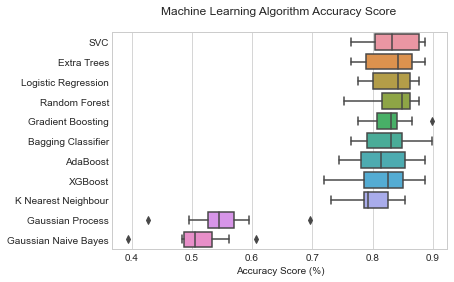

In [106]:
result_df = result_df.drop(['means'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

In [107]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    ax = data.tail(n).plot(kind='barh', figsize=(12, 8), fontsize=12)
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show();

In [108]:
# 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features':train.columns.tolist(), 
      'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

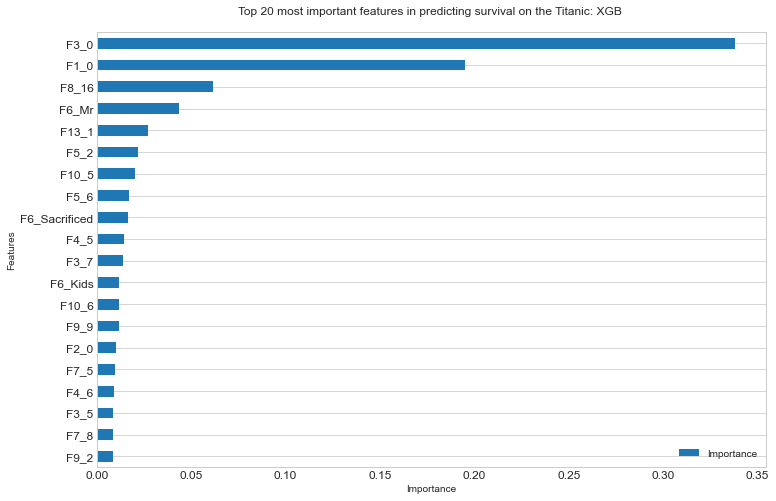

In [109]:
# 그래프 제목
title = 'Top 20 most important features in predicting survival on the Titanic: XGB \n'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

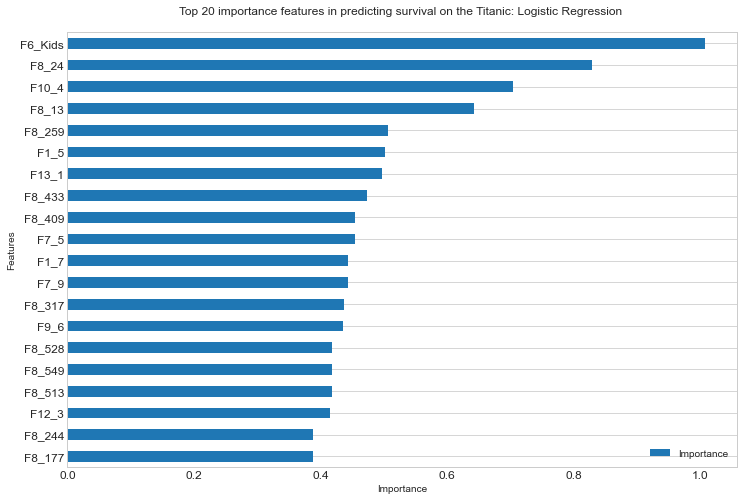

In [110]:
# 중요도를 데이터프레임에 넣습니다. Logistic regression에서는 중요도보다 coefficients를 사용합니다.
# 아래는 Features라는 열에 트레인의 열들의 이름을 리스트로 만들어서 넣고
# Importance에는 Logistic Regression에는 coefficient를 바꾸어 넣어라는 넘파이 명령입니다.(즉 가로를 세로로)

fi = {'Features': train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 importance features in predicting survival on the Titanic: Logistic Regression \n'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [111]:
# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature': train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature': train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature': train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature': train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature': train.columns, 'ada importance':ada.feature_importances_})

# 이를 하나의 데이터 프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

In [112]:
importances.head()

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,F1_0,0.202861,0.194967,0.044879,0.050733,0.02,0.102688
1,F3_0,0.076577,0.337814,0.038273,0.028678,0.00,0.096269
2,F6_Mr,0.186296,0.043465,0.038971,0.025568,0.02,0.062860
3,F12_1,0.095326,0.000000,0.037536,0.031545,0.02,0.036881
4,F13_1,0.036025,0.027062,0.014729,0.015995,0.04,0.026762


# Part 8: 중요도에 따라 모델 재 설정

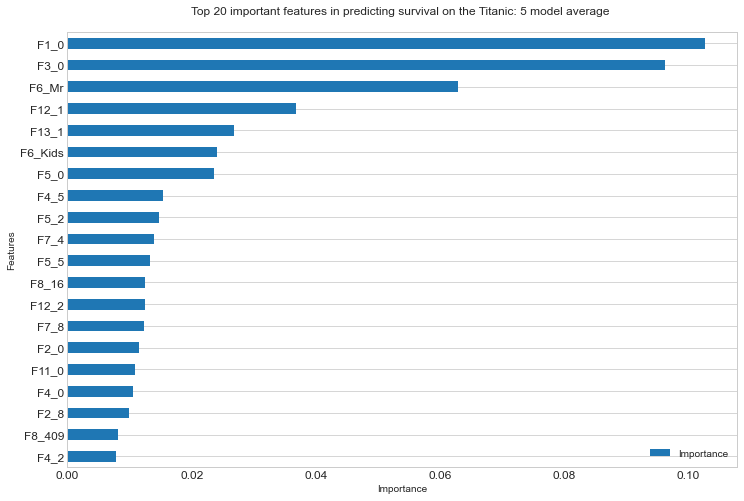

In [113]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: 5 model average \n'

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [114]:
importance1 = importance[-381:]
importance1[371:381]

,Importance
Features,
F7_4,0.014000
F5_2,0.014795
F4_5,0.015306
F5_0,0.023549
F6_Kids,0.024039
F13_1,0.026762
F12_1,0.036881
F6_Mr,0.062860
F3_0,0.096269


In [115]:
# 영양가 있는 380개만 넣기
mylist = list(importance1.index)
train1 = pd.DataFrame()
test1 = pd.DataFrame()

for i in mylist:
    train1[i] = train[i]
    test1[i] = test[i]
    
train1.head()

,F8_531,F8_397,F8_494,F3_6,F8_269,F8_86,F8_386,F8_141,F8_624,F8_641,...,F7_4,F5_2,F4_5,F5_0,F6_Kids,F13_1,F12_1,F6_Mr,F3_0,F1_0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1


In [116]:
train = train1
test = test1

# 모델의 변수를 다시 정의하고
X_train = train
X_test = test

# 바꿉니다.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1, eval_metric='error')
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 
               'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 
               'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores2 = {}

# 학습 및 교차검증
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring='accuracy', cv=10)
    scores2[model_names[ind]] = acc

In [118]:
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Bagging Classifier,0.855556,0.887640,0.775281,0.876404,0.876404,0.842697,0.853933,0.764045,0.831461,0.831461,0.839488
Logistic Regression,0.822222,0.853933,0.797753,0.853933,0.876404,0.808989,0.831461,0.786517,0.865169,0.842697,0.833908
Gradient Boosting,0.800000,0.831461,0.775281,0.898876,0.876404,0.831461,0.831461,0.797753,0.831461,0.842697,0.831685
Extra Trees,0.755556,0.865169,0.752809,0.887640,0.887640,0.853933,0.842697,0.764045,0.876404,0.820225,0.830612
Random Forest,0.811111,0.876404,0.752809,0.887640,0.887640,0.842697,0.831461,0.752809,0.842697,0.820225,0.830549
AdaBoost,0.744444,0.797753,0.775281,0.887640,0.865169,0.797753,0.842697,0.764045,0.876404,0.831461,0.818265
XGBoost,0.755556,0.831461,0.719101,0.887640,0.853933,0.853933,0.820225,0.775281,0.865169,0.820225,0.818252
SVC,0.822222,0.808989,0.775281,0.797753,0.853933,0.775281,0.786517,0.786517,0.865169,0.842697,0.811436
K Nearest Neighbour,0.744444,0.764045,0.752809,0.842697,0.808989,0.820225,0.808989,0.752809,0.842697,0.820225,0.795793
Gaussian Process,0.788889,0.775281,0.752809,0.775281,0.853933,0.808989,0.764045,0.764045,0.842697,0.831461,0.795743


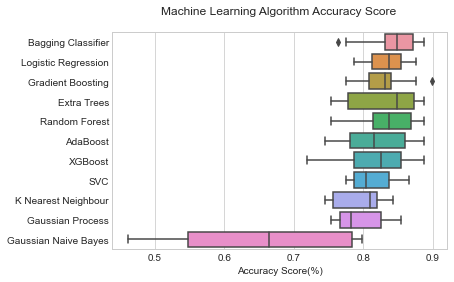

In [119]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score(%)');

# Part 9: 하이퍼 파라미터 튜닝
- Scikit-Learn에서는 3가지 모형 최적화 도구를 지원하는데 validation_curve / GridSearchCV / ParameterGrid이다.
- fit 메소드를 호출하면 grid search가 자동으로 여러개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾는다.
- bestscore는 최고 점수이고 best estimator는 최고 점수를 낸 파라미터를 가진 모형  

## 9_1. SVC  
- c 값과 gamma값은 10의 배수로 정하는 것이 일반적이다.
- 감마 매개 변수는 단일 학습 예제의 영향이 도달하는 정도를 정의하며 낮은 값은 'far'를, 높은 값은 'close'를 나타냅니다.
- 감마 매개 변수는 서포트 벡터로 모델에 의해 선택된 샘플의 영향 반경의 역으로 볼 수 있습니다.
- C 매개변수는 의사 결정 표면의 단순성에 대한 훈련 예제의 오분류를 제거합니다.
- C가 낮을수록 결정 표면이 매끄럽고 높은 C는 모델이 더 많은 샘플을 서포트벡터로 자유롭게 선택할 수 있도록 하여 모든 학습 예제를 올바르게 분류하는 것을 목표로 합니다.
- Verbose는 불리언 값으로 True로 넣으면 꼬치꼬치 다 알려주는데, 대신 시간이 좀 더 오래걸립니다.
- cv=5는 5 fold로 교차 검증한다는 뜻입니다.

In [120]:
# 파라미터 서치
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

# 파라미터 그리드 셋팅
hyperparams = {'C': Cs, 'gamma': gammas}

# 교차검증
gd = GridSearchCV(estimator=SVC(probability=True), param_grid=hyperparams,
                  verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

# 모델 fitting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   51.3s finished


0.8394890465130878
{'C': 10, 'gamma': 0.001}


## 9_2. Gradient Boosting Classifier
- learning_rate는 각 트리의 기여를 줄이는 역할을 합니다.
- n_estimator는 각 경우의 트리 숫자입니다.

In [121]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [ 3, 5, 10, 15 ]

hyperparams = {'learning_rate': learning_rate, 'n_estimators':n_estimators}

gd = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid=hyperparams, 
                  verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.1min finished


0.8417299604544597
{'learning_rate': 0.1, 'n_estimators': 2000}


## 9_3. Logistic Regression
- Penalty - L1을 사용하는 회귀 모델을 Lasso Regression이라고 하고 L2를 사용하는 모델을 Ridge Regression이라고 합니다.
- 이 둘의 차이점은 페널티입니다.
- 릿지회귀는 손실 함수에 페널티 항으로 계수의 "제곱 크기"를 추가합니다.
- L2-norm이 오차를 제곱하기 때문에( 오류 >1 인경우 로스가 증가함 )모델은 L1-norm보다 훨씬 큰 오차를 보게되므로 훨씬더 민감합니다.
- 따라서 오류를 최소화하기 위해 모델을 조정해줍니다.
- C는 estimator입니다.
- logspace 1차원 10개 배열로 0에서 4까지 estimator로 놓은 것입니다.

In [122]:
penalty = ['l1','l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty':penalty, 'C':C}

gd = GridSearchCV(estimator = LogisticRegression(), param_grid=hyperparams,
                 verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.6s


0.8327851358985626
{'C': 2.7825594022071245, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished


## 9_4. XGBoost Step 1.

In [123]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate':learning_rate, 'n_estimators':n_estimators}

gd = GridSearchCV(estimator=XGBClassifier(eval_metric='error'), param_grid = hyperparams,
                  verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.8s


0.8271922666499277
{'learning_rate': 0.2, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


## 9_5. XGBoost Step 2.

In [124]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(eval_metric='error', learning_rate=0.2, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.8s


0.8338836231247255
{'max_depth': 5, 'min_child_weight': 4}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.5s finished


## 9_6. XGBoost Step 3.

In [125]:
gamma = [i*0.1 for i in range(0, 5)]

hyperparams = {'gamma':gamma}

gd = GridSearchCV(estimator = XGBClassifier(eval_metric='error', learning_rate=0.2, 
                                            n_estimators=10, max_depth=5,
                                            min_child_weight=4),
                  param_grid = hyperparams, verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8338836231247255
{'gamma': 0.0}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished


## 9_7. XGBoost Step 4.

In [126]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

hyperparams = {'subsample':subsample, 'colsample_bytree':colsample_bytree}

gd = GridSearchCV(estimator = XGBClassifier(eval_metric='error', learning_rate=0.2, 
                                            n_estimators=10, max_depth=5,
                                            min_child_weight=4, gamma=0),
                  param_grid = hyperparams, verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.7s


0.8350134957002071
{'colsample_bytree': 0.95, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    8.5s finished


## 9_8. XGBoost Step 5.

In [127]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]

hyperparams = {'reg_alpha':reg_alpha}

gd = GridSearchCV(estimator = XGBClassifier(eval_metric='error', learning_rate=0.2, 
                                            n_estimators=10, max_depth=5,
                                            min_child_weight=4, gamma=0,
                                            colsample_bytree=0.85, subsample=1),
                  param_grid=hyperparams, verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8350134957002071
{'reg_alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.6s finished


## 9_9. Gaussian Process

In [128]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 
               'max_iter_predict':max_iter_predict,
               'warm_start':warm_start}

gd = GridSearchCV(estimator = GaussianProcessClassifier(), param_grid=hyperparams,
                  verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   56.7s finished


0.7991086560793421
{'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': True}


## 9_10. Adaboost

In [129]:
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

gd = GridSearchCV(estimator = AdaBoostClassifier(),
                  param_grid = hyperparams,
                  verbose=True, 
                  cv=5, 
                  scoring='accuracy',
                  n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   59.6s finished


0.8383528968677421
{'learning_rate': 0.5, 'n_estimators': 200}


## 9_11. KNN

In [130]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm': algorithm,
               'weights':weights,
               'leaf_size':leaf_size,
               'n_neighbors':n_neighbors}

gd = GridSearchCV(estimator = KNeighborsClassifier(),
                  param_grid = hyperparams,
                  verbose = True,
                  cv = 5, 
                  scoring = 'accuracy',
                  n_jobs = -1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.3s


0.8227041616973197
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   12.3s finished


## 9_12. Random Forest

In [131]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=hyperparams,
                verbose=True,
                cv=5, 
                scoring='accuracy', 
                n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   21.3s


0.8372669637813068
{'max_depth': None, 'max_features': 0.2, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   29.2s finished


## 9_13. Extra Trees

In [132]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gd = GridSearchCV(estimator = ExtraTreesClassifier(),
                  param_grid = hyperparams,
                  verbose = True,
                  cv = 5,
                  scoring='accuracy',
                  n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 594 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   29.8s finished


0.8361433682756889
{'max_depth': None, 'max_features': 0.2, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}


## 9_14. Bagging Classifier

In [133]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators': n_estimators,
               'max_samples': max_samples,
               'max_features': max_features}

gd = GridSearchCV(estimator = BaggingClassifier(),
                  param_grid = hyperparams,
                  verbose = True,
                  cv = 5,
                  scoring = 'accuracy',
                  n_jobs = -1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:  1.5min finished


0.8417174063147324
{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}


## 9_15. GaussianNB

In [134]:
var_smoothing = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]

hyperparams = {'var_smoothing': var_smoothing}
gd = GridSearchCV(estimator = GaussianNB(),
                  param_grid = hyperparams,
                  verbose = True,
                  cv = 5,
                  scoring = 'accuracy',
                  n_jobs = -1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  47 out of  70 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished


0.7777791726821921
{'var_smoothing': 0.001}


# part 10: 모델 재트레이닝

In [135]:
# 튜닝 모델 시작
# sample을 split하는 것은 전체 데이터 80%를 트레인 셋에는 20%는 테스트 셋에 줌
ran = RandomForestClassifier(max_depth= None, max_features= 0.1, min_samples_leaf= 2,  
                             min_samples_split= 6, n_estimators= 200, random_state=1)
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_neighbors= 4, weights= 'distance')
log = LogisticRegression(C= 2.7825594022071245, penalty= 'l2')
xgb = XGBClassifier(eval_metric='error', learning_rate=0.2, n_estimators=10, 
                    max_depth=5, min_child_weight=4, gamma=0,
                    colsample_bytree=0.85, subsample=1, reg_alpha= 1e-05)
gbc = GradientBoostingClassifier(learning_rate= 0.2, n_estimators= 1000)
svc = SVC(probability=True, C= 5, gamma= 0.001)
ext = ExtraTreesClassifier(max_depth= None, max_features= 0.2, 
                           min_samples_leaf= 10, min_samples_split= 10, n_estimators= 50)
ada = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 500)
gnb = GaussianNB(var_smoothing=0.01)
gpc = GaussianProcessClassifier(max_iter_predict= 1, n_restarts_optimizer= 0, warm_start= True)
bag = BaggingClassifier(max_features= 1.0, max_samples= 0.8, n_estimators= 75)

# 리스트
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
model_names= ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression',
              'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees',
              'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process','Bagging Classifier']
scores3 = {}

# 순차적으로 학습을 수행하고 cross-validate 수행
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring='accuracy', cv=10)
    scores3[model_names[ind]] = acc

In [136]:
results = pd.DataFrame(scores3).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Gradient Boosting,0.855556,0.887640,0.786517,0.887640,0.876404,0.831461,0.831461,0.786517,0.865169,0.831461,0.843983
Bagging Classifier,0.822222,0.887640,0.786517,0.887640,0.898876,0.831461,0.831461,0.764045,0.842697,0.842697,0.839526
SVC,0.833333,0.865169,0.808989,0.876404,0.887640,0.808989,0.831461,0.775281,0.865169,0.831461,0.838390
Extra Trees,0.822222,0.865169,0.764045,0.898876,0.876404,0.831461,0.831461,0.775281,0.853933,0.842697,0.836155
AdaBoost,0.833333,0.876404,0.808989,0.887640,0.853933,0.808989,0.808989,0.786517,0.842697,0.842697,0.835019
Random Forest,0.811111,0.876404,0.775281,0.898876,0.865169,0.831461,0.831461,0.764045,0.842697,0.831461,0.832797
XGBoost,0.811111,0.842697,0.764045,0.865169,0.887640,0.820225,0.820225,0.775281,0.876404,0.853933,0.831673
Logistic Regression,0.822222,0.842697,0.808989,0.831461,0.876404,0.808989,0.820225,0.786517,0.853933,0.842697,0.829413
K Nearest Neighbour,0.777778,0.831461,0.786517,0.853933,0.853933,0.808989,0.820225,0.752809,0.865169,0.853933,0.820474
Gaussian Process,0.788889,0.775281,0.752809,0.775281,0.853933,0.808989,0.764045,0.764045,0.842697,0.831461,0.795743


Text(0.5, 0, 'Accuracy Score (%)')

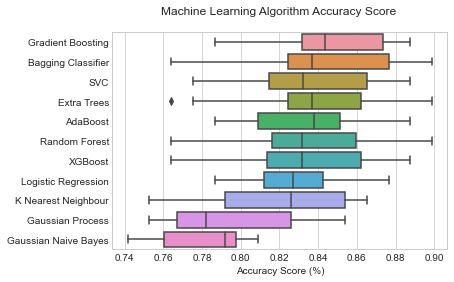

In [137]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')

# part 11: 마지막 보팅

In [138]:
grid_hard = VotingClassifier(estimators= [('Random Forest', ran),
                                          ('Logistic Regression', log),
                                          ('XGBoost', xgb),
                                          ('Gradient Boosting', gbc),
                                          ('Extra Trees', ext),
                                          ('AdaBoost', ada),
                                          ('Gaussian Process', gpc),
                                          ('SVC', svc),
                                          ('K Nearest Neighbour', knn),
                                          ('Gaussian Naive Bayes', gnb),
                                          ('Bagging Classifier', bag)], voting='hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)
print('Hard voting on test set score mean: {:.2f}'.format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 84.62


In [139]:
grid_soft = VotingClassifier(estimators= [('Random Forest', ran),
                                          ('Logistic Regression', log),
                                          ('XGBoost', xgb),
                                          ('Gradient Boosting', gbc),
                                          ('Extra Trees', ext),
                                          ('AdaBoost', ada),
                                          ('Gaussian Process', gpc),
                                          ('SVC', svc),
                                          ('K Nearest Neighbour', knn),
                                          ('Gaussian Naive Bayes', gnb),
                                          ('Bagging Classifier', bag)], voting='soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)
print('Hard voting on test set score mean: {:.2f}'.format(grid_soft_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 83.95


# Part 12: 마지막 모델 예측

In [140]:
# Final predictions1
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis='columns')
submission.columns = ['PassengerId', 'Survived']
submission.to_csv('titanic_submission.csv', header=True, index=False)

In [141]:
# Final predictions1
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis='columns')
submission.columns = ['PassengerId', 'Survived']
submission.to_csv('titanic_submission_soft.csv', header=True, index=False)